In [1]:
import read_data as rd
import clean_data as cd
import create_keras_model as ckm
import model_fit as mf

import pandas as pd
import numpy as np
import sys

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split

import skopt
from skopt import gp_minimize, forest_minimize
from skopt.space import Real, Categorical, Integer
from skopt.plots import plot_convergence
from skopt.plots import plot_objective, plot_evaluations
from skopt.plots import plot_objective
from skopt.utils import use_named_args



import matplotlib.pyplot as plt
%matplotlib inline


dataset = 'uci-news-aggregator.csv'

In [2]:
rd.read_data(dataset).head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [3]:
cat_count, dt = cd.clean_data(dataset)
cat_count

,CATEGORY
e,17943
b,13648
t,12976
m,5433


Text(0.5, 1.0, 'Count of News Articles in each Category')

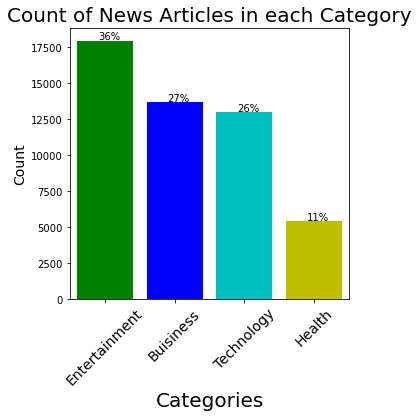

In [4]:
#plotting the distribution of counts of categories
plt.bar(cat_count.index,cat_count['CATEGORY'], color = ['g','b','c','y'])


ax = cat_count['CATEGORY'].plot(kind='bar' ,color = ['g','b','c','y'],figsize=(5,5), edgecolor=None)

for p in ax.patches[:4]:
    width, height = p.get_width(), p.get_height()
    perc = height/cat_count['CATEGORY'].sum()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(perc), (x+0.3, y + height + 70))


plt.xticks(cat_count.index,['Entertainment' , 'Buisiness', 'Technology','Health'],rotation=45, fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Categories' ,  fontsize=20)
plt.title('Count of News Articles in each Category', fontsize=20)

In [5]:
#Initilize arbitrary hyperparameters for the model



default_parameters = [1e-5, 1, 'sigmoid']


In [6]:
model = ckm.create_model(default_parameters[0], default_parameters[1], default_parameters[2])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 64)            640000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 10, 64)            0         
_________________________________________________________________
conv1d (Conv1D)              (None, 6, 64)             20544     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 3, 64)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
layer_dense_1 (Dense)        (None, 4)                 2

In [7]:
#Test with dafault parameters
default_model = mf.fitness(default_parameters)

learning rate: 1.0e-05
num_dense_layers: 1
activation: sigmoid

Epoch 1/3
274/274 [==============================] - 5s 12ms/step - loss: 1.4092 - accuracy: 0.1709 - val_loss: 1.3983 - val_accuracy: 0.1079
Epoch 2/3
274/274 [==============================] - 2s 8ms/step - loss: 1.4000 - accuracy: 0.2360 - val_loss: 1.3895 - val_accuracy: 0.3665
Epoch 3/3
274/274 [==============================] - 2s 8ms/step - loss: 1.3920 - accuracy: 0.2876 - val_loss: 1.3825 - val_accuracy: 0.3665

Accuracy: 36.65%



In [8]:
search_result = mf.minimize()

learning rate: 1.0e-05
num_dense_layers: 1
activation: sigmoid

Epoch 1/3
274/274 [==============================] - 5s 15ms/step - loss: 1.6217 - accuracy: 0.1110 - val_loss: 1.5867 - val_accuracy: 0.1079
Epoch 2/3
274/274 [==============================] - 2s 8ms/step - loss: 1.5752 - accuracy: 0.1121 - val_loss: 1.5413 - val_accuracy: 0.1079
Epoch 3/3
274/274 [==============================] - 2s 8ms/step - loss: 1.5320 - accuracy: 0.1129 - val_loss: 1.5024 - val_accuracy: 0.1079

Accuracy: 10.79%

learning rate: 1.1e-05
num_dense_layers: 5
activation: relu

Epoch 1/3
274/274 [==============================] - 6s 15ms/step - loss: 1.3856 - accuracy: 0.3553 - val_loss: 1.3833 - val_accuracy: 0.3665
Epoch 2/3
274/274 [==============================] - 2s 9ms/step - loss: 1.3824 - accuracy: 0.3582 - val_loss: 1.3792 - val_accuracy: 0.3665
Epoch 3/3
274/274 [==============================] - 2s 9ms/step - loss: 1.3778 - accuracy: 0.3564 - val_loss: 1.3738 - val_accuracy: 0.3665

Accurac

274/274 [==============================] - 10s 31ms/step - loss: 1.3303 - accuracy: 0.3365 - val_loss: 1.3102 - val_accuracy: 0.3665
Epoch 2/3
274/274 [==============================] - 6s 21ms/step - loss: 1.3196 - accuracy: 0.3515 - val_loss: 1.3105 - val_accuracy: 0.3665
Epoch 3/3
274/274 [==============================] - 5s 19ms/step - loss: 1.3149 - accuracy: 0.3578 - val_loss: 1.3139 - val_accuracy: 0.3665

Accuracy: 36.65%

learning rate: 1.0e-01
num_dense_layers: 6
activation: sigmoid

Epoch 1/3
274/274 [==============================] - 9s 27ms/step - loss: 1.3276 - accuracy: 0.3493 - val_loss: 1.3126 - val_accuracy: 0.3665
Epoch 2/3
274/274 [==============================] - 5s 18ms/step - loss: 1.3210 - accuracy: 0.3495 - val_loss: 1.3102 - val_accuracy: 0.3665
Epoch 3/3
274/274 [==============================] - 5s 18ms/step - loss: 1.3168 - accuracy: 0.3570 - val_loss: 1.3149 - val_accuracy: 0.3665

Accuracy: 36.65%

learning rate: 2.2e-03
num_dense_layers: 3
activation: 

274/274 [==============================] - 9s 26ms/step - loss: 1.1095 - accuracy: 0.4940 - val_loss: 0.6114 - val_accuracy: 0.7667
Epoch 2/3
274/274 [==============================] - 5s 17ms/step - loss: 0.5903 - accuracy: 0.7790 - val_loss: 0.3783 - val_accuracy: 0.8729
Epoch 3/3
274/274 [==============================] - 5s 18ms/step - loss: 0.3795 - accuracy: 0.8759 - val_loss: 0.3459 - val_accuracy: 0.8913

Accuracy: 89.13%

learning rate: 6.3e-03
num_dense_layers: 1
activation: relu

Epoch 1/3
274/274 [==============================] - 8s 25ms/step - loss: 1.3417 - accuracy: 0.3439 - val_loss: 1.3105 - val_accuracy: 0.3665
Epoch 2/3
274/274 [==============================] - 4s 16ms/step - loss: 1.3157 - accuracy: 0.3569 - val_loss: 1.3110 - val_accuracy: 0.3665
Epoch 3/3
274/274 [==============================] - 5s 17ms/step - loss: 1.3136 - accuracy: 0.3552 - val_loss: 1.3107 - val_accuracy: 0.3665

Accuracy: 36.65%

learning rate: 7.5e-03
num_dense_layers: 1
activation: relu

In [9]:
search_result.x

[0.004887107439852398, 1, 'relu']

In [10]:
opt_par = search_result.x
optimized_model = mf.fitness(opt_par)

learning rate: 4.9e-03
num_dense_layers: 1
activation: relu

Epoch 1/3
274/274 [==============================] - 9s 25ms/step - loss: 1.0636 - accuracy: 0.5088 - val_loss: 0.4686 - val_accuracy: 0.8607
Epoch 2/3
274/274 [==============================] - 5s 19ms/step - loss: 0.4843 - accuracy: 0.8494 - val_loss: 0.3975 - val_accuracy: 0.8829
Epoch 3/3
274/274 [==============================] - 5s 19ms/step - loss: 0.3557 - accuracy: 0.8920 - val_loss: 0.3631 - val_accuracy: 0.8934

Accuracy: 89.34%



In [11]:
def_hist = mf.plot_accuracy(default_parameters)

Epoch 1/20
274/274 [==============================] - 7s 19ms/step - loss: 1.4362 - accuracy: 0.1596 - val_loss: 1.4244 - val_accuracy: 0.1079
Epoch 2/20
274/274 [==============================] - 5s 19ms/step - loss: 1.4249 - accuracy: 0.1788 - val_loss: 1.4160 - val_accuracy: 0.2524
Epoch 3/20
274/274 [==============================] - 5s 18ms/step - loss: 1.4176 - accuracy: 0.2006 - val_loss: 1.4097 - val_accuracy: 0.2524
Epoch 4/20
274/274 [==============================] - 5s 18ms/step - loss: 1.4098 - accuracy: 0.2170 - val_loss: 1.4049 - val_accuracy: 0.2524
Epoch 5/20
274/274 [==============================] - 5s 17ms/step - loss: 1.4069 - accuracy: 0.2245 - val_loss: 1.4010 - val_accuracy: 0.2524
Epoch 6/20
274/274 [==============================] - 5s 19ms/step - loss: 1.4012 - accuracy: 0.2406 - val_loss: 1.3978 - val_accuracy: 0.2524
Epoch 7/20
274/274 [==============================] - 5s 19ms/step - loss: 1.3992 - accuracy: 0.2440 - val_loss: 1.3951 - val_accuracy: 0.2524

In [12]:
#def_hist = mf.plot_accuracy(default_parameters)
opt_hist = mf.plot_accuracy(opt_par)


Epoch 1/20
274/274 [==============================] - 7s 18ms/step - loss: 1.0968 - accuracy: 0.4849 - val_loss: 0.4259 - val_accuracy: 0.8609
Epoch 2/20
274/274 [==============================] - 5s 18ms/step - loss: 0.4365 - accuracy: 0.8576 - val_loss: 0.3463 - val_accuracy: 0.8920
Epoch 3/20
274/274 [==============================] - 5s 17ms/step - loss: 0.3237 - accuracy: 0.8966 - val_loss: 0.3334 - val_accuracy: 0.8970
Epoch 4/20
274/274 [==============================] - 5s 18ms/step - loss: 0.2732 - accuracy: 0.9139 - val_loss: 0.3299 - val_accuracy: 0.8988
Epoch 5/20
274/274 [==============================] - 5s 17ms/step - loss: 0.2263 - accuracy: 0.9290 - val_loss: 0.3359 - val_accuracy: 0.9007
Epoch 6/20
274/274 [==============================] - 5s 18ms/step - loss: 0.2136 - accuracy: 0.9288 - val_loss: 0.3384 - val_accuracy: 0.8999
Epoch 7/20
274/274 [==============================] - 5s 19ms/step - loss: 0.2016 - accuracy: 0.9364 - val_loss: 0.3454 - val_accuracy: 0.9003

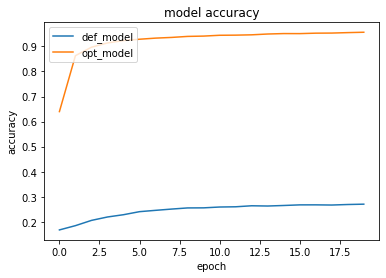

In [15]:
plt.plot(def_hist.history['accuracy'])
plt.plot(opt_hist.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['def_model', 'opt_model'], loc='upper left')
plt.show()